<a href="https://colab.research.google.com/github/erinmoulton/DS-4002-Project-1/blob/main/SCRIPTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup, Cleaning and EDA

### loading dataset and intro stats

In [ ]:
import pandas as pd
#quick method to read in the data
def load_movie_data():
  # please update with the name of CSV or rename your local file
  movie_data = pd.read_csv('RT_top_movies_premium.csv')
  return movie_data

In [ ]:
#setup the dataframe
movie_df = load_movie_data()
#print some quick stats about the initial dataframe
print('Total MB usage: ' + str(movie_df.memory_usage(index=True).sum() / (1024 * 1024)) + ' MB')
print('Total entries: ' + str(len(movie_df)))
print('Num features: ' + str(movie_df.shape[1]))

Total MB usage: 111.62007427215576 MB
Total entries: 1444963
Num features: 11


In [ ]:
print(movie_df.dtypes)

id                object
reviewId           int64
creationDate      object
criticName        object
isTopCritic         bool
originalScore     object
reviewState       object
publicatioName    object
reviewText        object
scoreSentiment    object
reviewUrl         object
dtype: object


In [ ]:
print(movie_df.columns)

Index(['id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment', 'reviewUrl'],
      dtype='object')


In [ ]:
#quality of life update that displays the full review in dataframe peeks
pd.set_option('display.max_colwidth', None)

In [ ]:
# Check and print missing values
missing_values = movie_df.isnull().sum()
print(missing_values[missing_values > 0])

originalScore    435218
reviewText        69225
reviewUrl        210925
dtype: int64


### cleaning

In [ ]:
#drop every column from the dataframe except for the key columns identified
movie_df = movie_df[['id', 'creationDate', 'reviewState', 'reviewText', 'scoreSentiment', 'isTopCritic']]

In [ ]:
#drop any null values from the review text
movie_df = movie_df.dropna(subset=['reviewText'])
#isolate creation date into year created
movie_df['creationDate'] = pd.to_datetime(movie_df['creationDate'])
movie_df['year_created'] = movie_df['creationDate'].dt.year
#drop the original creationdate column
movie_df.drop('creationDate', axis=1, inplace=True)

In [ ]:
len(movie_df)

1375738

In [ ]:
#standardize review text
movie_df['reviewText'] = movie_df['reviewText'].str.lower().str.strip()
#drop duplicate reviews
movie_df = movie_df.drop_duplicates(subset=['reviewText'], keep='first')

# Check the number of remaining rows after dropping duplicates
print(f"Number of entries after dropping duplicates: {len(movie_df)}")

Number of entries after dropping duplicates: 1359668


In [ ]:
unique_years = movie_df['year_created'].unique()
print(unique_years)

[2003 2007 2019 2018 2015 2022 2020 2021 2011 2002 2010 2008 2017 2009
 2016 2006 2005 2023 2014 2012 2004 2013 2000 1994 2001 1993 1996 1997
 1999 1982 1990 1954 1989 1928 1935 1981 1941 1995 1984 1992 1986 1929
 1998 1988 1953 1800 1960 1978 1937 1991 1956 1983 1938 1958 1985 1962
 1940 1963 1948 1942 1950 1939 1979 1987 1977 1969 1930 1980 1927 1955
 1945 1943 1976 1923 1931 1934 1970 1944 1971 1951 1959 1974 1967 1932
 1965 1936 1949 1946 1933]


In [ ]:
movie_df['year_created'].value_counts()

,count
year_created,
2019,105878
2020,92873
2021,91640
2018,90521
2022,86765
...,...
1931,1
1970,1
1944,1


In [ ]:
movie_df = movie_df[movie_df['year_created'] != 1800]

### EDA plots + more cleaning

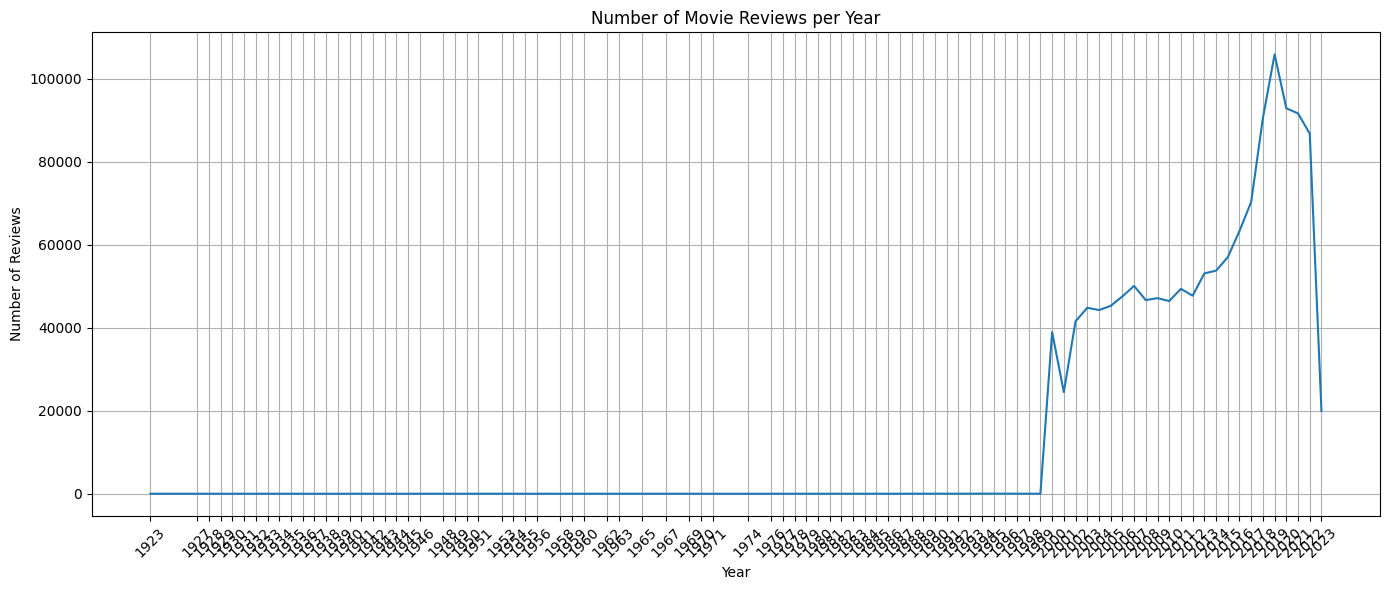

In [ ]:
# plots how many reviews per year created PRIOR to specifying after the year 2004
import matplotlib.pyplot as plt
review_counts_by_year = movie_df['year_created'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.plot(review_counts_by_year.index, review_counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Movie Reviews per Year')
plt.grid(True)
plt.xticks(ticks=review_counts_by_year.index, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#drop all movie reviews created before 2004
movie_df = movie_df[movie_df['year_created'] > 2004]

In [ ]:
# recheck missing vals to make sure we good
missing_values = movie_df.isnull().sum()
print(missing_values)

id                0
reviewState       0
reviewText        0
scoreSentiment    0
isTopCritic       0
year_created      0
dtype: int64


In [ ]:
import html

def replace_html_entities(text):
  #Replaces HTML entities in a text string with their corresponding characters.
  #basically gets rid of &#44 and &quot so reviews are just plain english now.
  return html.unescape(text)

movie_df['reviewText'] = movie_df['reviewText'].apply(replace_html_entities)

In [ ]:
import re

#can expand this during the actual analysis depending on whats neccesary
def clean_review_text(text):
  text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
  return text

movie_df['reviewText'] = movie_df['reviewText'].apply(clean_review_text)

In [ ]:
#quality of life column name changes
movie_df.rename(columns={'id': 'movieTitle', 'reviewText': 'review', 'reviewState': 'fresh_or_rotten'}, inplace=True)
movie_df.head(10)

,movieTitle,fresh_or_rotten,review,scoreSentiment,isTopCritic,year_created
1,blood_mask,rotten,"it doesn't matter if a movie costs 300 million or only 300 dollars; good is good and bad is bad, and bloodmask: the possession of nicole lameroux is just plain bad.",NEGATIVE,False,2007
2,city_hunter_shinjuku_private_eyes,fresh,"the choreography is so precise and lifelike at points one might wonder whether the movie was rotoscoped, but no live-action reference footage was used. the quality is due to the skill of the animators and kodama's love for professional wrestling.",POSITIVE,False,2019
3,city_hunter_shinjuku_private_eyes,rotten,the film's out-of-touch attempts at humor may find them hunting for the reason the franchise was so popular in the first place.,NEGATIVE,False,2019
4,dangerous_men_2015,fresh,its clumsy determination is endearing and sometimes wildly entertaining,POSITIVE,False,2018
5,dangerous_men_2015,fresh,"with every new minute, there's another head-scratching choice that's bound to elicit some amazing out-loud responses, so this feels like a true party flick.",POSITIVE,False,2015
6,dangerous_men_2015,fresh,"emotionless reaction shots, zero characterization, guns that have absolutely no special effects when blasted - dangerous men is rare winning dish from a one star restaurant.",POSITIVE,False,2015
7,dangerous_men_2015,rotten,"conceivably, it could serve as a primer for students on how not to make a movie, and perhaps as a deconstruction of filmic conventions for the more theoretical minded.",NEGATIVE,True,2015
8,dangerous_men_2015,rotten,"if you're not a fan of garbage cinema, even for the fun of it, dangerous men is best to be avoided.",NEGATIVE,False,2015
9,dangerous_men_2015,rotten,"""dangerous men,"" the picture's production notes inform, took 26 years to reach the big screen. after having seen it, i wonder: what was the rush?",NEGATIVE,True,2015
10,dangerous_men_2015,rotten,will entertain some viewers and infuriate others with its clunky mix of feminist fury and awkward action sequences.,NEGATIVE,False,2015


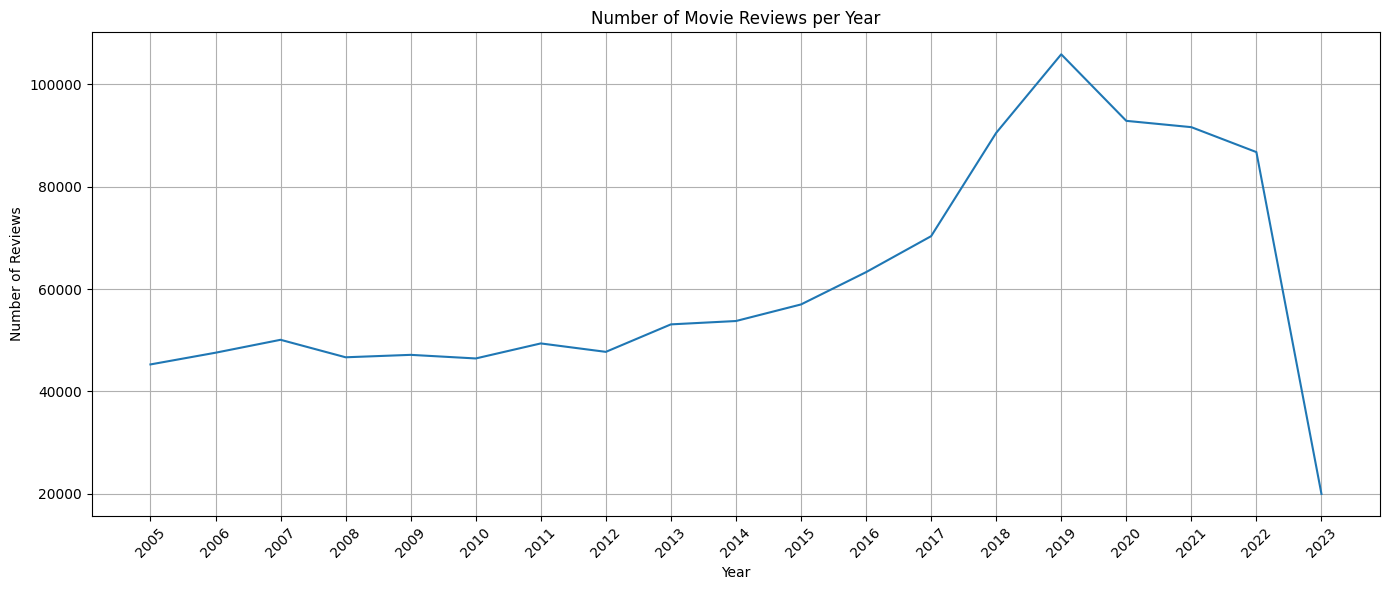

In [ ]:
import matplotlib.pyplot as plt

# plots how many reviews per year created
review_counts_by_year = movie_df['year_created'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.plot(review_counts_by_year.index, review_counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Movie Reviews per Year')
plt.grid(True)
plt.xticks(ticks=review_counts_by_year.index, rotation=45)

plt.tight_layout()
plt.show()


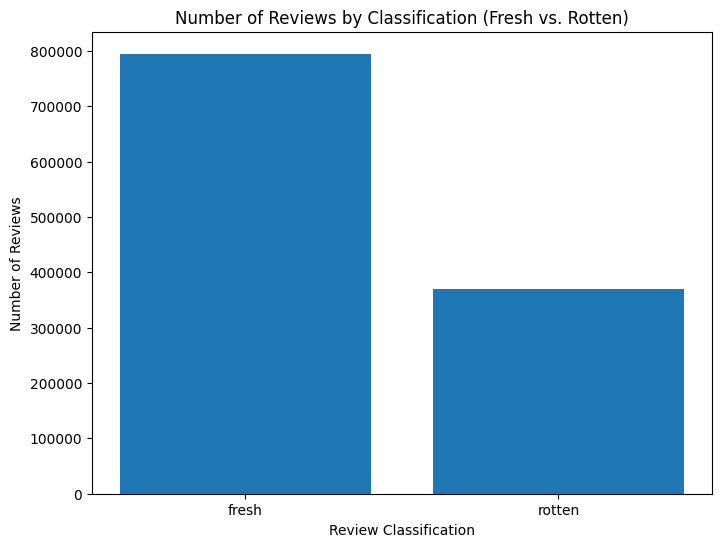

In [ ]:
#plot total fresh vs rotten reviews

review_state_counts = movie_df.groupby('fresh_or_rotten')['review'].count()

plt.figure(figsize=(8, 6))
plt.bar(review_state_counts.index, review_state_counts.values)
plt.xlabel('Review Classification')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Classification (Fresh vs. Rotten)')
plt.show()

In [ ]:
review_state_counts

,review
fresh_or_rotten,
fresh,794864
rotten,370416


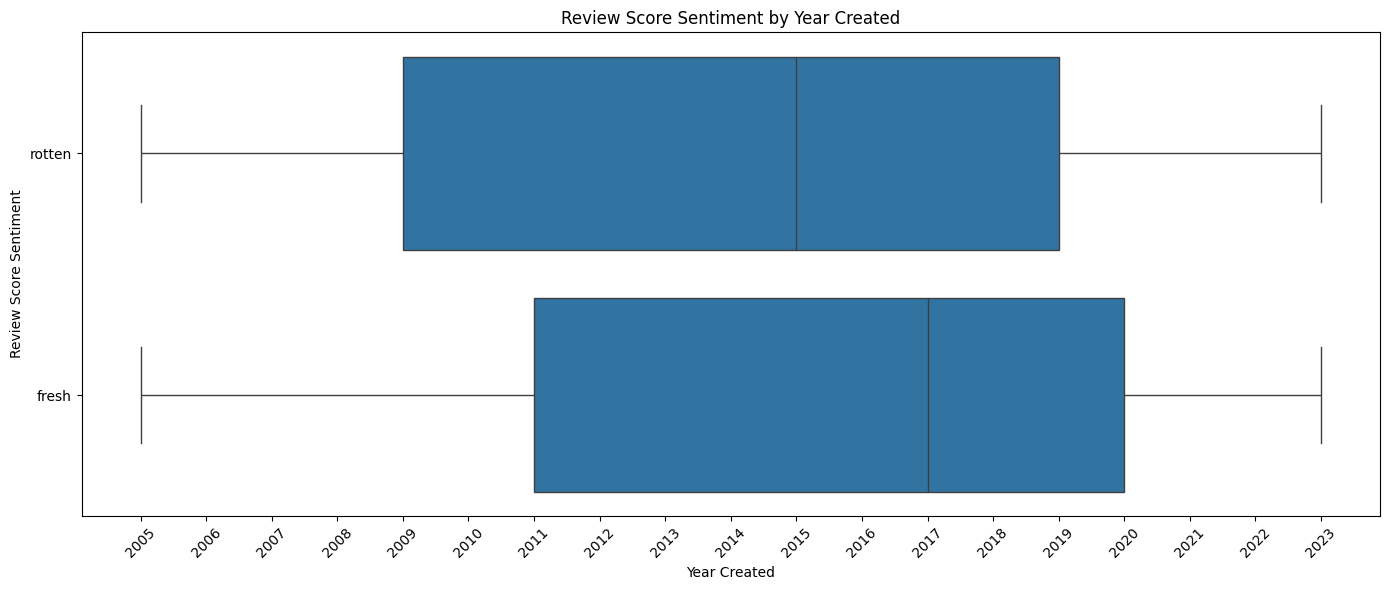

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between year created and review score
plt.figure(figsize=(14, 6))
sns.boxplot(x='year_created', y='fresh_or_rotten', data=movie_df)

plt.xlabel('Year Created')
plt.ylabel('Review Score Sentiment')
plt.title('Review Score Sentiment by Year Created')
plt.xticks(ticks=movie_df['year_created'].unique(), rotation=45)

plt.tight_layout()
plt.show()


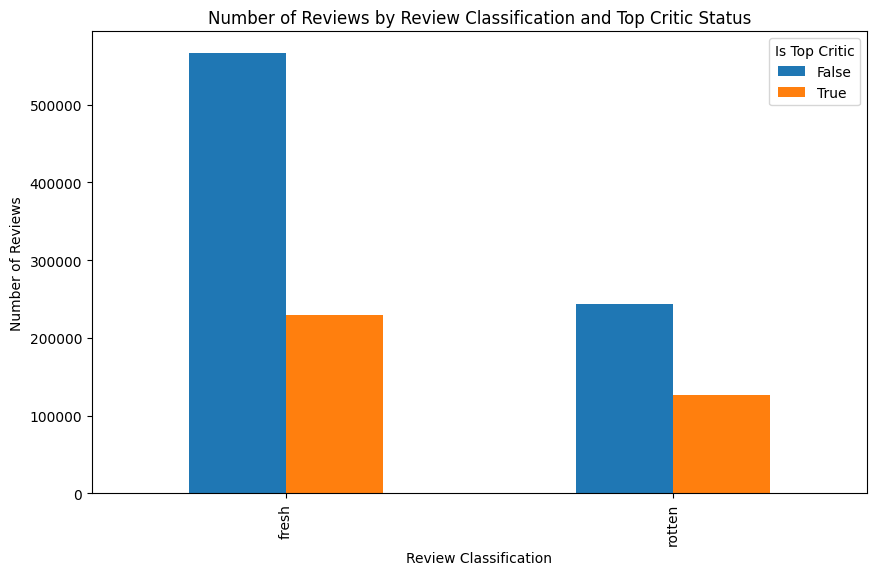

In [ ]:
#graph of review classification vs is top critic

import matplotlib.pyplot as plt

review_state_top_critic_counts = movie_df.groupby(['fresh_or_rotten', 'isTopCritic'])['review'].count().unstack()

review_state_top_critic_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Review Classification')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Review Classification and Top Critic Status')
plt.legend(title='Is Top Critic')
plt.show()


In [ ]:
review_state_top_critic_counts

isTopCritic,False,True
fresh_or_rotten,,
fresh,565901,228963
rotten,243201,127215


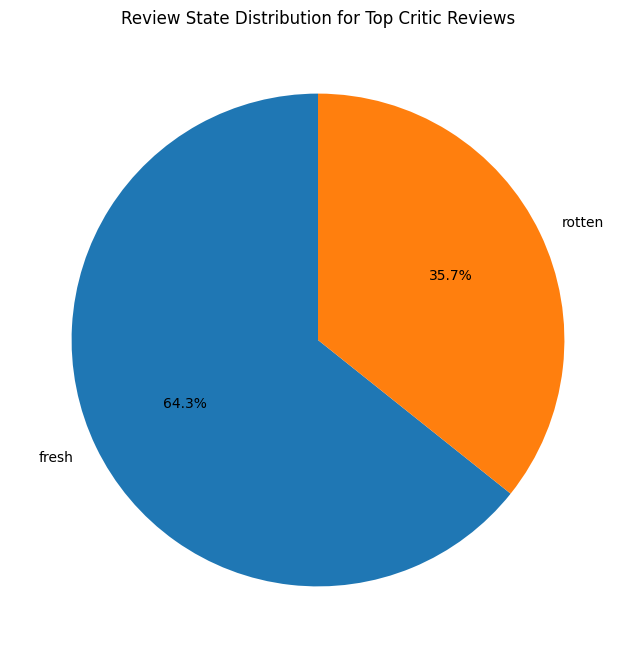

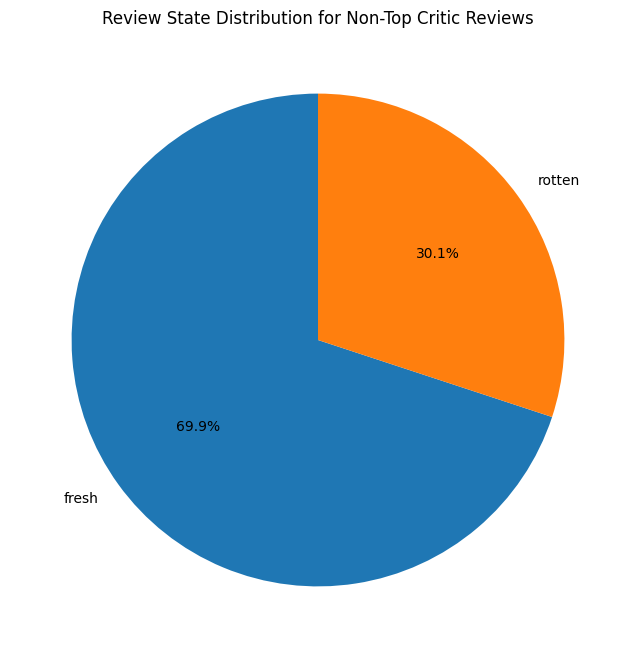

In [ ]:
# Create a pie chart of the review state distribution for top critic reviews
top_critic_reviews = movie_df[movie_df['isTopCritic'] == True]
top_critic_review_state_counts = top_critic_reviews['fresh_or_rotten'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(top_critic_review_state_counts, labels=top_critic_review_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Review State Distribution for Top Critic Reviews')
plt.show()

# Create a pie chart of the review state distribution for non-top critic reviews
non_top_critic_reviews = movie_df[movie_df['isTopCritic'] == False]
non_top_critic_review_state_counts = non_top_critic_reviews['fresh_or_rotten'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(non_top_critic_review_state_counts, labels=non_top_critic_review_state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Review State Distribution for Non-Top Critic Reviews')
plt.show()


In [ ]:
#Is the fresh_or_rotten consistent with the scoreSentiment
#contingency table
import matplotlib.pyplot as plt
import seaborn as sns
contingency_table = pd.crosstab(movie_df['fresh_or_rotten'], movie_df['scoreSentiment'])
print(contingency_table)

scoreSentiment   NEGATIVE  POSITIVE
fresh_or_rotten                    
fresh                   0    794864
rotten             370416         0


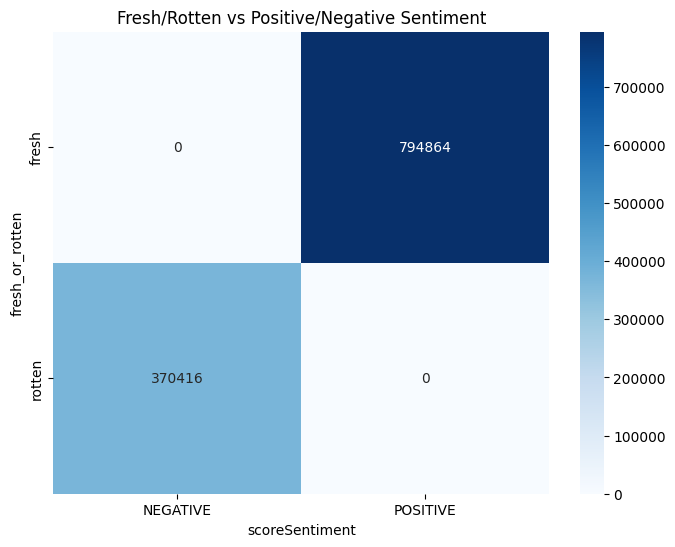

In [ ]:
#heatmap to show perfect correlation
plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Fresh/Rotten vs Positive/Negative Sentiment')
plt.show()

In [ ]:
#print the top 30 movies by total reviews
top_50_ids = movie_df['movieTitle'].value_counts().head(50)
print(top_50_ids)
#(use these for the next cell)

movieTitle
joker_2019                                     597
once_upon_a_time_in_hollywood                  578
avengers_endgame                               553
captain_marvel                                 552
a_star_is_born_2018                            531
black_panther_2018                             531
star_wars_the_rise_of_skywalker                522
the_batman                                     507
dune_2021                                      498
avengers_infinity_war                          488
star_wars_the_last_jedi                        487
solo_a_star_wars_story                         484
wonder_woman_2017                              479
parasite_2019                                  476
knives_out                                     472
la_la_land                                     470
top_gun_maverick                               469
the_irishman                                   468
dunkirk_2017                                   467
rogue_one_a_star_war

In [ ]:
#get user input to check 10 reviews of a movie
#default to joker_2019
sample_revs = movie_df[movie_df['movieTitle'] == 'joker_2019'] #str(input("What Movie to check? "))] #user input
sample_revs['review'].head(10)

,review
592154,"the theatrical trailer for joker -- tight, controlled, and intriguing -- suggested the best movie martin scorsese never made. the actual movie is a shallow and sophomoric effort that isn't about a raging bull as much as it's merely raging bulls***."
592155,"what makes this world so successful is the message. ... negativity, like the trash, builds up over time when people are too stubborn to see the other perspective and compromise. there's a social divide in gotham city that feels very real."
592156,"in the simply titled joker, we get yet another version and this one is probably the most toxic of them all and not in a satisfying way."
592157,"as “joker” slow-walks us towards its eventual maelstrom of iniquity, it never spells out how we should feel about its titular character."
592158,"joker is violent, raw, and hits closer to home than many are willing to admit."
592159,"phoenix's preparation for and commitment to this role honours ledger and his other predecessors, with an exhausted physicality, contortionist and gollum-gaunt."
592160,the joker is a powerful idea about accountability in our society but it's clear the script wasn't there. luckily they were able to make it work with improv and interpretive dance.
592161,"it's less a genuinely transgressive approach than one closely modeled on the work of martin scorsese, and thus more an exercise in homage than rebellion. even so, that won't stop people from aggrandizing it."
592162,"every decade has that one transcendent film that, as time progresses, ultimately becomes a classic for cinephiles. as the 2010s decade comes to a close, the one film that will undoubtedly age like a fine wine is todd phillips masterpiece, joker."
592163,"as committed as i was to phoenixs performance, i found myself walking out of the theater wondering, why did we need to tell this deeply violent and triggering story now? where does dc go from here and this standalone film?"


In [ ]:
print(movie_df.dtypes)

movieTitle         object
fresh_or_rotten    object
review             object
scoreSentiment     object
isTopCritic          bool
year_created        int32
dtype: object


Review 1     2
Review 2     2
Review 3     2
Review 4     2
Review 5     2
Review 6     2
Review 7     2
Review 8     2
Review 9     2
Review 10    2
Name: count, dtype: int64


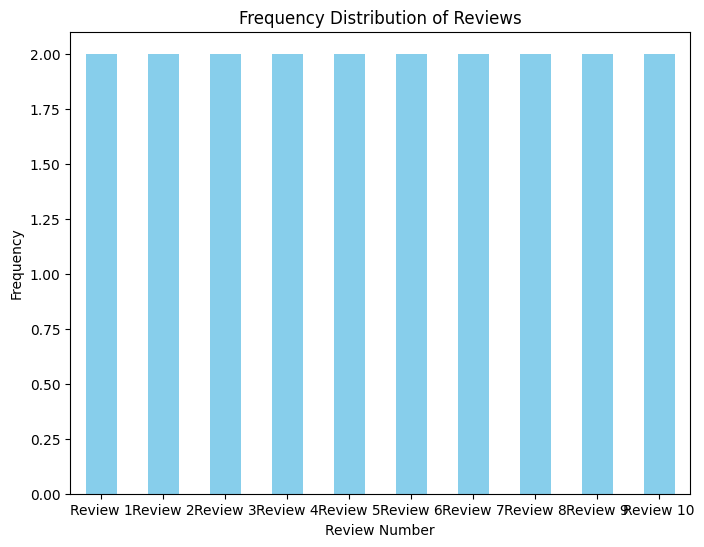

In [ ]:
# frequency distribution - top 10 reviews
freq_table = movie_df['review'].value_counts().head(10)

# Assign a number to each of the top 10 reviews
top_reviews_dict = {review: f'Review {i+1}' for i, review in enumerate(freq_table.index)}

# Replace the review text with the assigned number
freq_table.index = [top_reviews_dict[review] for review in freq_table.index]

# Display the frequency table (with numbered labels)
print(freq_table)

# Bar chart distribution
plt.figure(figsize=(8, 6))
freq_table.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Reviews')
plt.xlabel('Review Number')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
top_n_reviews = movie_df['review'].value_counts().head(10)

# Display the frequency table
print(top_n_reviews)

review
fascinating.                                2
the performances are uniformly superb.      2
...watchable yet entirely forgettable...    2
it's a mess.                                2
...breezy, light-hearted...                 2
tepid.                                      2
a stunning misfire.                         2
a beautiful bore.                           2
a stone-cold masterpiece.                   2
pretty lousy.                               2
Name: count, dtype: int64


scoreSentiment
POSITIVE    794864
NEGATIVE    370416
Name: count, dtype: int64


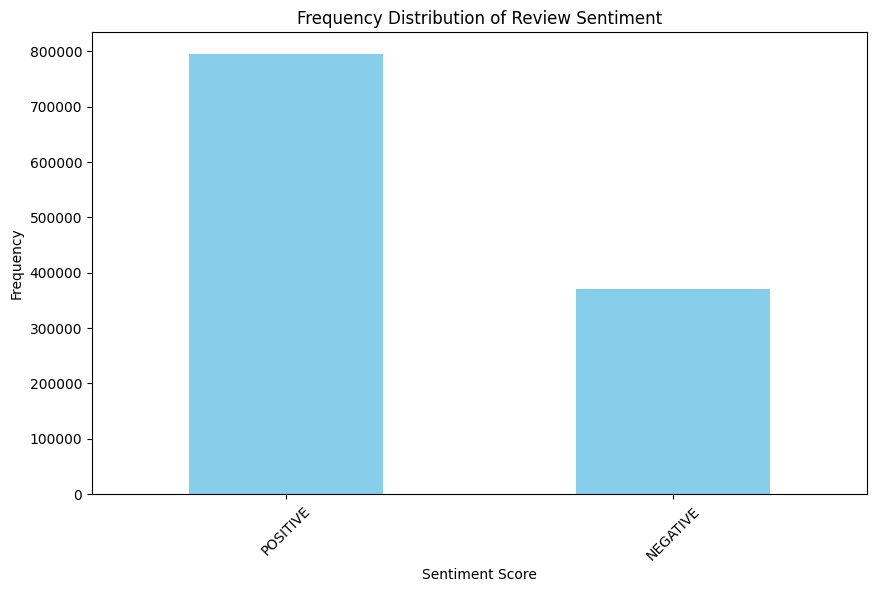

In [ ]:
# Create frequency distribution for 'scoreSentiment'
freq_table = movie_df['scoreSentiment'].value_counts()
print(freq_table)

#bar plot frequency distribution
plt.figure(figsize=(10, 6))
freq_table.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Review Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Analysis

### LLM approach

In [ ]:
#14 min runtime
!pip install transformers
from transformers import pipeline
import random

sample_df = movie_df.sample(n=10000, random_state=42)  # Use a random state for reproducibility

sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment using the LLM pipeline
def analyze_sentiment_llm(review):
    try:
        result = sentiment_pipeline(review)[0]
        return result['label'], result['score']
    except Exception as e:
        print(f"Error analyzing review: {e}")
        return None, None

# Apply the LLM sentiment analysis function to the sample dataframe
sample_df[['llm_sentiment', 'llm_score']] = sample_df['review'].apply(lambda x: pd.Series(analyze_sentiment_llm(x)))

# Print the updated sample dataframe
print(sample_df.head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. Th

                              movieTitle fresh_or_rotten  \
1068905                           mongol           fresh   
579935               the_french_dispatch           fresh   
804690   sir_alex_ferguson_never_give_in           fresh   
545569           in_the_heart_of_the_sea           fresh   
1002517              city_of_ghosts_2017           fresh   

                                                                                                                                                                                                                                          review  \
1068905                                                                      mongol, from its thrilling battles to its intimate romance, has the look, scale, story and feel of an old-fashioned epic in the best and biggest sense of the word.   
579935                                                                                                                            writer-director wes a

### plots for LLM sentiment vs actual



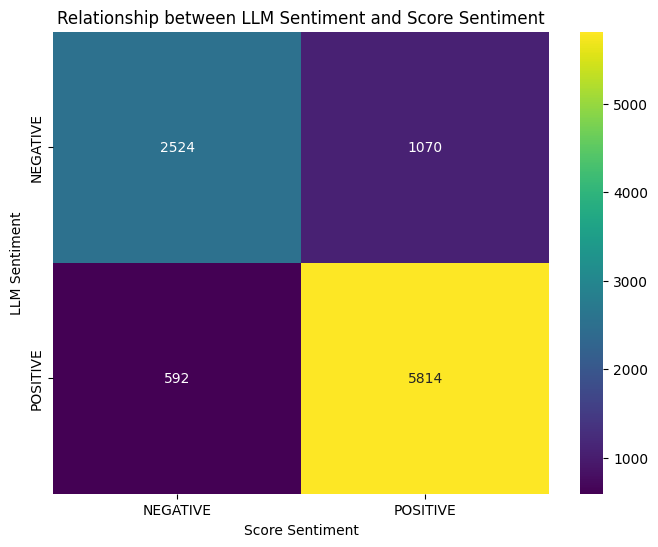

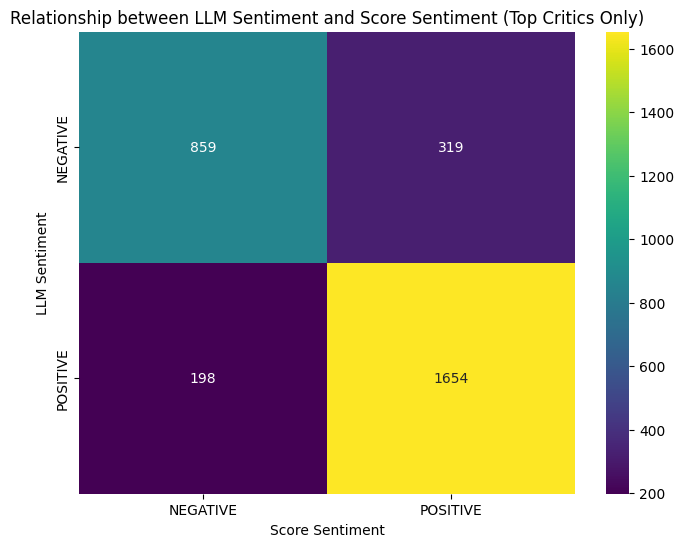

In [ ]:
contingency_table_llm = pd.crosstab(sample_df['llm_sentiment'], sample_df['scoreSentiment'])

# Create a heatmap to visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_llm, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between LLM Sentiment and Score Sentiment')
plt.xlabel('Score Sentiment')
plt.ylabel('LLM Sentiment')
plt.show()

top_critic_reviews = sample_df[sample_df['isTopCritic'] == True]
contingency_table_llm_top_critics = pd.crosstab(top_critic_reviews['llm_sentiment'], top_critic_reviews['scoreSentiment'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_llm_top_critics, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between LLM Sentiment and Score Sentiment (Top Critics Only)')
plt.xlabel('Score Sentiment')
plt.ylabel('LLM Sentiment')
plt.show()


### word analysis from LLM approach data


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TfidfVectorizer with custom stop words (adding some common neutral words)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Filter reviews by sentiment
positive_reviews = sample_df[sample_df['llm_sentiment'] == 'POSITIVE']['review']
negative_reviews = sample_df[sample_df['llm_sentiment'] == 'NEGATIVE']['review']

# Fit and transform the positive and negative reviews
positive_tfidf = vectorizer.fit_transform(positive_reviews)
negative_tfidf = vectorizer.fit_transform(negative_reviews)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF values across all reviews for each word (axis=0)
positive_tfidf_sums = positive_tfidf.sum(axis=0)
negative_tfidf_sums = negative_tfidf.sum(axis=0)

# Convert sums to a flat array
positive_scores = positive_tfidf_sums.A1
negative_scores = negative_tfidf_sums.A1

# Create DataFrames for positive and negative word scores
word_scores = pd.DataFrame({
    'word': feature_names,
    'positive_score': positive_scores,
    'negative_score': negative_scores
})

# Calculate the score difference between positive and negative reviews
word_scores['score_diff'] = word_scores['positive_score'] - word_scores['negative_score']

# Set a threshold to filter out neutral words (e.g., words with a small score difference)
neutral_threshold = 10  # You can adjust this value

# Filter for words that are more strongly positive or negative
positive_influential_words = word_scores[word_scores['score_diff'] > neutral_threshold]
negative_influential_words = word_scores[word_scores['score_diff'] < -neutral_threshold]

# Sort by score difference
top_positive_influential_words = positive_influential_words.sort_values(by='score_diff', ascending=False).head(10)
top_negative_influential_words = negative_influential_words.sort_values(by='score_diff', ascending=True).head(10)

# Display the top influential words
print("Top 10 influential words in positive reviews:")
print(top_positive_influential_words[['word', 'score_diff']])

print("\nTop 10 influential words in negative reviews:")
print(top_negative_influential_words[['word', 'score_diff']])

Top 10 influential words in positive reviews:
          word  score_diff
324  franchise  237.835492
584    musical  156.863422
829     studio   98.632998
380      heart   82.486457
892    totally   77.047396
513       long   74.308225
811    started   73.382071
61       basic   71.454002
719       rock   70.894113
216      drags   69.852080

Top 10 influential words in negative reviews:
       word  score_diff
300    film -120.587182
578   movie -104.662666
500    like  -76.772265
456    just  -51.857326
211   doesn  -37.789280
820   story  -33.595331
352    good  -32.525313
506  little  -32.242453
883    time  -30.898716
71   better  -26.413541


### comparison of accuracy

In [ ]:
sample_df.head(20)

,movieTitle,fresh_or_rotten,review,scoreSentiment,isTopCritic,year_created,sentiment,sentiment_scores,llm_sentiment,llm_score
1068905,mongol,fresh,"mongol, from its thrilling battles to its intimate romance, has the look, scale, story and feel of an old-fashioned epic in the best and biggest sense of the word.",POSITIVE,True,2008,POSITIVE,"{'neg': 0.068, 'neu': 0.649, 'pos': 0.283, 'compound': 0.8519}",POSITIVE,0.999860
579935,the_french_dispatch,fresh,writer-director wes anderson and an ensemble cast deliver an endlessly creative series of stand-alone stories.,POSITIVE,True,2021,POSITIVE,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.4404}",POSITIVE,0.999628
804690,sir_alex_ferguson_never_give_in,fresh,"directed by his son, jason ferguson, it's a bittersweet -- if selective -- meditation on the famously ferocious manager's life.",POSITIVE,False,2021,NEGATIVE,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'compound': -0.1779}",POSITIVE,0.998656
545569,in_the_heart_of_the_sea,fresh,"it's shrewd filmmaking - howard understands he's showing these grisly images to a modern audience that will recoil, but he also manages to convey the justifiable excitement these men must have felt to accomplish a job so dangerous.",POSITIVE,False,2015,POSITIVE,"{'neg': 0.103, 'neu': 0.718, 'pos': 0.179, 'compound': 0.5284}",POSITIVE,0.996812
1002517,city_of_ghosts_2017,fresh,"heineman may have made the definitive contemporary documentary about the tragedy of syria, as well as an epoch-defining piece on modern media tactics.",POSITIVE,True,2017,NEGATIVE,"{'neg': 0.16, 'neu': 0.764, 'pos': 0.076, 'compound': -0.5106}",POSITIVE,0.999510
1377378,city_of_ember,rotten,city of ember starts out promising and ends up ho-hum.,NEGATIVE,False,2008,POSITIVE,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.4019}",NEGATIVE,0.991199
1314792,stink,fresh,"a chilling exploration of the toxic underpinnings of the word ""fragrance"" that appears on detergents and colognes alike.",POSITIVE,False,2015,POSITIVE,"{'neg': 0.061, 'neu': 0.833, 'pos': 0.106, 'compound': 0.2023}",POSITIVE,0.999331
230613,dont_breathe_2,rotten,"it's hard not to imagine all of the better things rookie director rodo sayagues, who also co-wrote this movie and the original, could have made with ingredients this good.",NEGATIVE,False,2021,POSITIVE,"{'neg': 0.04, 'neu': 0.715, 'pos': 0.245, 'compound': 0.8006}",POSITIVE,0.999729
609029,the_bay_2012,fresh,a straightforward whatdunnit and a passionate slap in the face for a spineless epa.,POSITIVE,True,2012,POSITIVE,"{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'compound': 0.6124}",NEGATIVE,0.989144
1198320,manchurian_candidate,fresh,"ingal, mais efficace.",POSITIVE,False,2005,NEUTRAL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",POSITIVE,0.970741


In [ ]:
from sklearn.metrics import accuracy_score

def convert_to_binary(sentiment):
  if sentiment == 'POSITIVE':
    return 1
  else:
    return 0

sample_df['scoreSentiment_binary'] = sample_df['scoreSentiment'].apply(convert_to_binary)
sample_df['sentiment_binary'] = sample_df['sentiment'].apply(convert_to_binary)
sample_df['llm_sentiment_binary'] = sample_df['llm_sentiment'].apply(convert_to_binary)

accuracy_sentiment = accuracy_score(sample_df['scoreSentiment_binary'], sample_df['sentiment_binary'])
accuracy_llm = accuracy_score(sample_df['scoreSentiment_binary'], sample_df['llm_sentiment_binary'])

print(f"Accuracy of Sentiment Analysis: {accuracy_sentiment:.4f}")
print(f"Accuracy of LLM Sentiment Analysis: {accuracy_llm:.4f}")

Accuracy of Sentiment Analysis: 0.6197
Accuracy of LLM Sentiment Analysis: 0.8338


### Manual sentiment analysis- Not Using

In [ ]:
!pip install nltk vaderSentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#started @ 12:15 - to end @ 12:29
analyzer = SentimentIntensityAnalyzer()

def analyze_and_score_sentiment(review):
    # Get polarity scores
    scores = analyzer.polarity_scores(review)
    compound_score = scores['compound']

    # Determine sentiment based on compound score
    if compound_score >= 0.15:
        sentiment = 'Positive'
    elif compound_score <= -0.15:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    # Return both sentiment and the sentiment scores
    return sentiment, scores

# Apply the combined function to get both sentiment and scores
movie_df[['sentiment', 'sentiment_scores']] = movie_df['review'].apply(lambda x: pd.Series(analyze_and_score_sentiment(x)))


In [ ]:
movie_df.head(5)

,movieTitle,fresh_or_rotten,review,scoreSentiment,isTopCritic,year_created,sentiment,sentiment_scores
1,blood_mask,rotten,"it doesn't matter if a movie costs 300 million or only 300 dollars; good is good and bad is bad, and bloodmask: the possession of nicole lameroux is just plain bad.",NEGATIVE,False,2007,Negative,"{'neg': 0.28, 'neu': 0.58, 'pos': 0.14, 'compound': -0.6979}"
2,city_hunter_shinjuku_private_eyes,fresh,"the choreography is so precise and lifelike at points one might wonder whether the movie was rotoscoped, but no live-action reference footage was used. the quality is due to the skill of the animators and kodama's love for professional wrestling.",POSITIVE,False,2019,Positive,"{'neg': 0.06, 'neu': 0.815, 'pos': 0.124, 'compound': 0.6124}"
3,city_hunter_shinjuku_private_eyes,rotten,the film's out-of-touch attempts at humor may find them hunting for the reason the franchise was so popular in the first place.,NEGATIVE,False,2019,Positive,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6924}"
4,dangerous_men_2015,fresh,its clumsy determination is endearing and sometimes wildly entertaining,POSITIVE,False,2018,Positive,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6808}"
5,dangerous_men_2015,fresh,"with every new minute, there's another head-scratching choice that's bound to elicit some amazing out-loud responses, so this feels like a true party flick.",POSITIVE,False,2015,Positive,"{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.9014}"


In [ ]:
#debug as we have sarcasm showing labeled positive but actually negative and seeing if the opposite also occurs
actually_positive_reviews = movie_df[(movie_df['sentiment'] == 'Negative') & (movie_df['scoreSentiment'] == 'POSITIVE')]
actually_positive_reviews[['review', 'sentiment', 'scoreSentiment', 'sentiment_scores']].head(20)

,review,sentiment,scoreSentiment,sentiment_scores
13,to sit through it feels like honoring the dreamers of the world who at least get shit done. is it terrible? of course. is there belly-dancing? duh.,Negative,POSITIVE,"{'neg': 0.197, 'neu': 0.641, 'pos': 0.162, 'compound': -0.3094}"
20,this is the kind of movie that draws you so deeply into its story you are reluctant to let it end.,Negative,POSITIVE,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.25}"
22,"naczek isn't interested in making a soap opera with this examination of fallibility, going somewhere much more authentic when exploring character aches and pains.",Negative,POSITIVE,"{'neg': 0.261, 'neu': 0.739, 'pos': 0.0, 'compound': -0.7234}"
28,the story itself slithers with twists and turns and unexpected betrayals. it's almost ridiculous how many characters die in this film.,Negative,POSITIVE,"{'neg': 0.243, 'neu': 0.757, 'pos': 0.0, 'compound': -0.7275}"
30,"miller has taken a small, intimate tale and expanded it into a treatise on larger themes, primarily the abuse of the american dream.",Negative,POSITIVE,"{'neg': 0.167, 'neu': 0.754, 'pos': 0.079, 'compound': -0.4939}"
31,a classic american tragedy.,Negative,POSITIVE,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'compound': -0.6597}"
42,"south korean political history of the previous twenty years, peppermint candy is not tempered by its hysterical edge, which adds unpredictable violence to its vignettes of romantic, domestic, and business failure.",Negative,POSITIVE,"{'neg': 0.223, 'neu': 0.707, 'pos': 0.071, 'compound': -0.7003}"
44,"this is korea's millennial elegy, filtering its search for times past through a confection no less bittersweet than proust's madeleine.",Negative,POSITIVE,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'compound': -0.2975}"
45,the film offers a heartbreaking drama told in reverse chronology and spanning twenty years in both the life of the main character and the political history of korea.,Negative,POSITIVE,"{'neg': 0.103, 'neu': 0.897, 'pos': 0.0, 'compound': -0.4588}"
56,"a would-be tearjerker without the singing-dancing musical numbers of typical bollywood fare seen in the u.s., the lackluster paa is for die-hard amitabh bachchan fans only%u2014of which there is no small number.",Negative,POSITIVE,"{'neg': 0.068, 'neu': 0.892, 'pos': 0.04, 'compound': -0.2263}"


In [ ]:
#stats for movies that should be positive
positive_scores = [score['pos'] for score in movie_df['sentiment_scores']]
average_positive_score = sum(positive_scores) / len(positive_scores)
median_positive_score = sorted(positive_scores)[len(positive_scores) // 2]
print(f"Average Positive Score: {average_positive_score:.4f}")
print(f"Median Positive Score: {median_positive_score:.4f}")


Average Positive Score: 0.1635
Median Positive Score: 0.1480


In [ ]:
actually_negative_reviews = movie_df[(movie_df['sentiment'] == 'Positive') & (movie_df['scoreSentiment'] == 'NEGATIVE')]
actually_negative_reviews[['review', 'sentiment', 'scoreSentiment', 'sentiment_scores']].head(20)

,review,sentiment,scoreSentiment,sentiment_scores
3,the film's out-of-touch attempts at humor may find them hunting for the reason the franchise was so popular in the first place.,Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.6924}"
8,"if you're not a fan of garbage cinema, even for the fun of it, dangerous men is best to be avoided.",Positive,NEGATIVE,"{'neg': 0.249, 'neu': 0.501, 'pos': 0.25, 'compound': 0.2589}"
19,"despite some intriguing character dynamics and performances that generate sympathy for this fractured family, the film stumbles when it veers into melodrama without the narrative dexterity to tackle its weightier ambitions.",Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.5574}"
24,debuting screenwriter jason naczek has concocted a manchild redemption story using metaphors as heavy as a hammer and a fairy godmother who makes everything alright with a seeming flip of the switch.,Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.25}"
55,"well-acted, funny and occasionally witty with terrific make-up design. however, it's often convoluted, awkwardly paced and too uneven as a whole.",Positive,NEGATIVE,"{'neg': 0.092, 'neu': 0.679, 'pos': 0.229, 'compound': 0.5325}"
63,"standard cable fodder all the way, with only a few solid action scenes and maybe one colorful performance in the whole thing.",Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'compound': 0.1531}"
83,this kind of formalism needs to do more than walk through classical wonders. it should want to create cinema that can stand near or beside them. this movie defensively consecrates what's already there. you don't need a film to do that.,Positive,NEGATIVE,"{'neg': 0.038, 'neu': 0.881, 'pos': 0.081, 'compound': 0.2023}"
89,"pretentious, stuffy and slow. there's some beautiful scenery here but oh, what you must put up with to earn it!",Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.4102}"
102,mostly ... it remains focused on the not-very-interesting personal stories of four cowboy-loving guys on a gap-year adventure.,Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.5994}"
105,the gift shop dvd from an exciting horse farm.,Positive,NEGATIVE,"{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.7269}"


In [ ]:
#stats for movies that should be negative
negative_scores = [score['neg'] for score in movie_df['sentiment_scores']]
average_negative_score = sum(negative_scores) / len(negative_scores)
median_negative_score = sorted(negative_scores)[len(negative_scores) // 2]
print(f"Average Negative Score: {average_negative_score:.4f}")
print(f"Median Negative Score: {median_negative_score:.4f}")


Average Negative Score: 0.0832
Median Negative Score: 0.0410


Note: the sarcasm in certain movie reviews leads to the sentiment analysis predicting false positives and false negatives, so we will adjust our approach to rely on an LLM for labeling the sentiments.

### TF IDF Analysis- Not Using


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Separate reviews by sentiment
positive_reviews = movie_df[movie_df['sentiment'] == 'Positive']['review']
negative_reviews = movie_df[movie_df['sentiment'] == 'Negative']['review']
neutral_reviews = movie_df[movie_df['sentiment'] == 'Neutral']['review']

# Function to get top words using TF-IDF
def get_top_words(reviews, n_top_words=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    feature_names = vectorizer.get_feature_names_out()

    # Calculate the average TF-IDF score for each word across all reviews
    average_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
    word_tfidf_scores = dict(zip(feature_names, average_tfidf_scores))
    sorted_word_tfidf_scores = sorted(word_tfidf_scores.items(), key=lambda x: x[1], reverse=True)

    # Get the top n words
    top_words = [word for word, score in sorted_word_tfidf_scores[:n_top_words]]
    return top_words

top_positive_words = get_top_words(positive_reviews)
top_negative_words = get_top_words(negative_reviews)
top_neutral_words = get_top_words(neutral_reviews)

movie_df['sentiment'] = movie_df['sentiment'].str.upper()

In [ ]:
def print_top_words(top_words, title):
    print(f"\n{title}")
    print("-" * len(title))

    for i, word in enumerate(top_words, 1):
        print(f"{i}. {word}")

# Example usage:
print_top_words(top_positive_words, 'Top Words in Positive Reviews')
print_top_words(top_negative_words, 'Top Words in Negative Reviews')
print_top_words(top_neutral_words, 'Top Words in Neutral Reviews')



Top Words in Positive Reviews
-----------------------------
1. film
2. movie
3. like
4. story
5. good
6. best
7. comedy
8. just
9. great
10. fun

Top Words in Negative Reviews
-----------------------------
1. film
2. movie
3. horror
4. story
5. just
6. like
7. bad
8. time
9. review
10. spanish

Top Words in Neutral Reviews
----------------------------
1. film
2. movie
3. story
4. just
5. review
6. spanish
7. time
8. like
9. doesn
10. way


In [ ]:
common_neutral_words = set(top_neutral_words)

top_positive_unique_words = [word for word in top_positive_words if word not in common_neutral_words]
top_negative_unique_words = [word for word in top_negative_words if word not in common_neutral_words]

print_top_words(top_positive_unique_words, 'Top Unique Words in Positive Reviews (Excluding Neutral)')
print_top_words(top_negative_unique_words, 'Top Unique Words in Negative Reviews (Excluding Neutral)')



Top Unique Words in Positive Reviews (Excluding Neutral)
--------------------------------------------------------
1. good
2. best
3. comedy
4. great
5. fun

Top Unique Words in Negative Reviews (Excluding Neutral)
--------------------------------------------------------
1. horror
2. bad


### plots about the calculated sentiment vs actual- Not Using

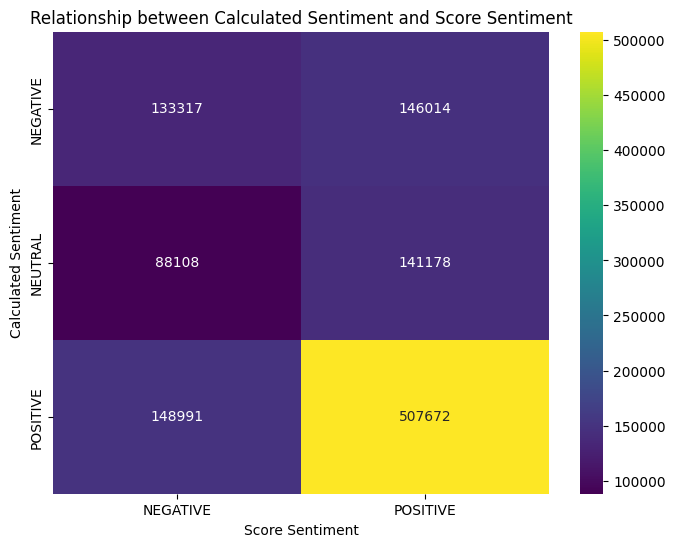

In [ ]:
contingency_table = pd.crosstab(movie_df['sentiment'], movie_df['scoreSentiment'])

# Create a heatmap to visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Calculated Sentiment and Score Sentiment')
plt.xlabel('Score Sentiment')
plt.ylabel('Calculated Sentiment')
plt.show()


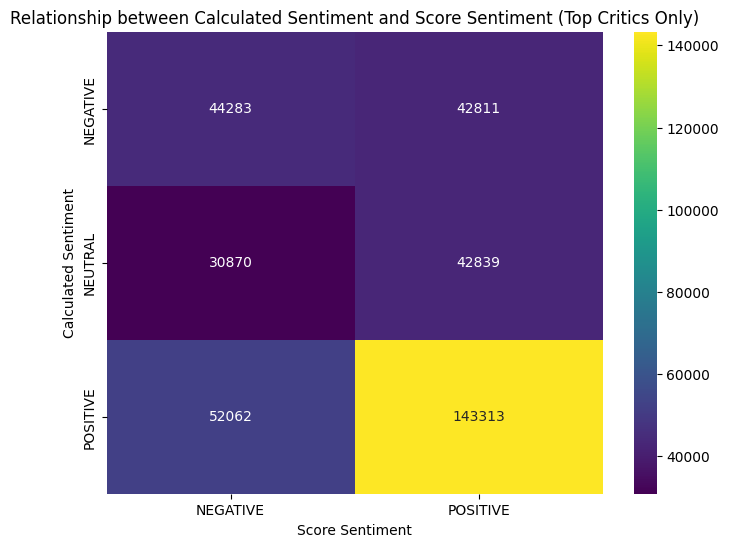

In [ ]:
top_critic_reviews = movie_df[movie_df['isTopCritic'] == True]
contingency_table_top_critics = pd.crosstab(top_critic_reviews['sentiment'], top_critic_reviews['scoreSentiment'])

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_top_critics, annot=True, fmt='d', cmap='viridis')
plt.title('Relationship between Calculated Sentiment and Score Sentiment (Top Critics Only)')
plt.xlabel('Score Sentiment')
plt.ylabel('Calculated Sentiment')
plt.show()


# Train our own ML model
using LLM approach

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

# Step 1: Split the data into training and test sets (80% train, 20% test)
X = sample_df['review']  # Input: reviews
y = sample_df['llm_sentiment']  # Target: sentiments (POSITIVE or NEGATIVE)

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Refit the TF-IDF vectorizer on training data only
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the training set reviews
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test set (use the same vectorizer from training)
X_test_tfidf = vectorizer.transform(X_test)

# Step 3: Conduct a chi-squared test to assess feature importance
chi2_stat, p_values = chi2(X_train_tfidf, y_train)

# Step 4: Display the results
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display chi-squared scores and p-values
chi2_results = pd.DataFrame({
    'feature': feature_names,
    'chi2_stat': chi2_stat,
    'p_value': p_values
})

# Sort by chi-squared statistic
chi2_results = chi2_results.sort_values(by='chi2_stat', ascending=False)

# Display the top 10 words with the highest chi-squared statistic
print("Top 10 words by Chi-squared statistic:")
print(chi2_results.head(10))

Top 10 words by Chi-squared statistic:
          feature  chi2_stat       p_value
282         fails  30.509934  3.321613e-08
52            bad  24.224490  8.573512e-07
987         worst  22.370114  2.248458e-06
222          dull  20.893692  4.854907e-06
554          mess  16.305954  5.389436e-05
211         doesn  15.743527  7.253572e-05
251  entertaining  15.443495  8.500904e-05
503          like  14.076688  1.755056e-04
380          half  13.835139  1.995688e-04
73          bland  13.192096  2.811323e-04


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train_tfidf, y_train)

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='POSITIVE')
recall = recall_score(y_test, y_pred, pos_label='POSITIVE')
f1 = f1_score(y_test, y_pred, pos_label='POSITIVE')

# Step 4: Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Optional: Display the full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.7210
Precision: 0.7364
Recall: 0.8790
F1 Score: 0.8014

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.67      0.44      0.53       719
    POSITIVE       0.74      0.88      0.80      1281

    accuracy                           0.72      2000
   macro avg       0.70      0.66      0.67      2000
weighted avg       0.71      0.72      0.70      2000

